In [3]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from keras import backend as K
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.callbacks import TensorBoard
from keras.datasets import mnist

Defining a utility func to load the data

In [6]:
def load_data():
  input_image = Input(shape = (28,28,1))
   # Loading the data and dividing the data into training and testing sets
  (X_train, _), (X_test, _) = mnist.load_data()
      
  # Cleaning and reshaping the data as required by the model
  X_train = X_train.astype('float32') / 255.
  X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
  X_test = X_test.astype('float32') / 255.
  X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))
      
  return X_train, X_test, input_image

Defining a utility function to build the Auto-encoder neural network

In [7]:
def build_network(input_image):
      
    # Building the encoder of the Auto-encoder
    x = Conv2D(16, (3, 3), activation ='relu', padding ='same')(input_image)
    x = MaxPooling2D((2, 2), padding ='same')(x)
    x = Conv2D(8, (3, 3), activation ='relu', padding ='same')(x)
    x = MaxPooling2D((2, 2), padding ='same')(x)
    x = Conv2D(8, (3, 3), activation ='relu', padding ='same')(x)
    encoded_layer = MaxPooling2D((2, 2), padding ='same')(x)
      
    # Building the decoder of the Auto-encoder
    x = Conv2D(8, (3, 3), activation ='relu', padding ='same')(encoded_layer)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(8, (3, 3), activation ='relu', padding ='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation ='relu')(x)
    x = UpSampling2D((2, 2))(x)
    decoded_layer = Conv2D(1, (3, 3), activation ='sigmoid', padding ='same')(x)
      
    return decoded_layer

Defining a utility function to build and train the Auto-encoder network

In [13]:
def build_auto_encoder_model(X_train, X_test, input_image, decoded_layer):
      
    # Defining the parameters of the Auto-encoder
    autoencoder = Model(input_image, decoded_layer)
    autoencoder.compile(optimizer ='adadelta', loss ='binary_crossentropy')
      
    # Training the Auto-encoder
    autoencoder.fit(X_train, X_train,
                epochs = 5,
                batch_size = 256,
                shuffle = True,
                validation_data =(X_test, X_test),
                callbacks =[TensorBoard(log_dir ='/tmp / autoencoder')])
      
    return autoencoder

Defining a utility function to visualize the reconstruction

In [14]:
def visualize(model, X_test):
      
    # Reconstructing the encoded images
    reconstructed_images = model.predict(X_test)
      
    plt.figure(figsize =(20, 4))
    for i in range(1, 11):
          
        # Generating a random to get random results
        rand_num = randint(0, 10001)
      
        # To display the original image
        ax = plt.subplot(2, 10, i)
        plt.imshow(X_test[rand_num].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
  
        # To display the reconstructed image
        ax = plt.subplot(2, 10, i + 10)
        plt.imshow(reconstructed_images[rand_num].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
          
    # Displaying the plot
    plt.show()

Calling the utility functions in the appropriate order

In [15]:
X_train, X_test, input_image = load_data()

In [16]:
decoded_layer = build_network(input_image)

In [17]:
auto_encoder_model = build_auto_encoder_model(X_train,
                                             X_test,
                                             input_image,
                                             decoded_layer)

Epoch 1/5
235/235 [==============================] - 80s 338ms/step - loss: 0.6931 - val_loss: 0.6928
Epoch 2/5
235/235 [==============================] - 84s 359ms/step - loss: 0.6925 - val_loss: 0.6923
Epoch 3/5
235/235 [==============================] - 80s 341ms/step - loss: 0.6919 - val_loss: 0.6916
Epoch 4/5
235/235 [==============================] - 80s 339ms/step - loss: 0.6912 - val_loss: 0.6908
Epoch 5/5
235/235 [==============================] - 80s 338ms/step - loss: 0.6904 - val_loss: 0.6899


313/313 [==============================] - 6s 20ms/step


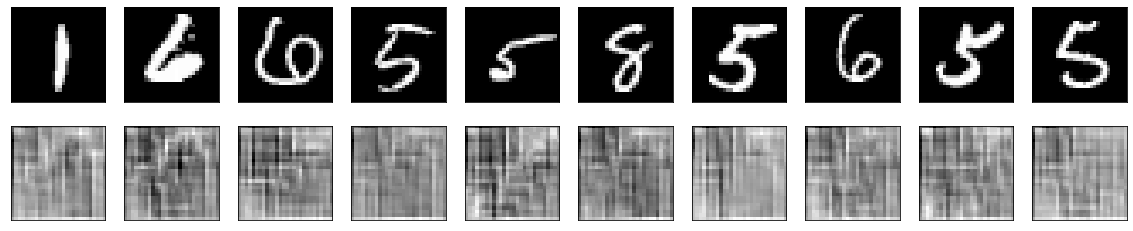

In [18]:
visualize(auto_encoder_model, X_test)